<a href="https://colab.research.google.com/github/Nidzoki/PMFST_IntroToDS_Examples_of_Good_Practice/blob/main/5/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluacijske metrike


In [1]:
# Osnovni importi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, load_diabetes

import warnings
warnings.filterwarnings('ignore')

---

## 1. Klasifikacija

U ovom dijelu istražit ćemo metrike za klasifikaciju. Koristit ćemo **'Breast Cancer Wisconsin'** dataset.


In [2]:
# 1.1 Učitavanje i priprema podataka (Klasifikacija)

# Učitavanje dataseta
data_class = load_breast_cancer()
X_class = pd.DataFrame(data_class.data, columns=data_class.feature_names)
y_class = pd.Series(data_class.target, name='target')

# 0 = malignant (zloćudni), 1 = benign (dobroćudni)
print("Distribucija klasa:")
print(y_class.value_counts(normalize=True))
print("\nShape X_class:", X_class.shape)


Distribucija klasa:
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

Shape X_class: (569, 30)


In [3]:
# 1.2 Podjela podataka (Klasifikacija)

# Koristimo 'stratify=y_class' kako bismo osigurali istu distribuciju klasa u train i test setu

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

print("Train set shape:", X_train_c.shape)
print("Test set shape:", X_test_c.shape)

Train set shape: (455, 30)
Test set shape: (114, 30)


In [4]:
# 1.3 Skaliranje podataka (Klasifikacija)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)


X_train_c_scaled = pd.DataFrame(X_train_c_scaled, columns=X_class.columns)
X_test_c_scaled = pd.DataFrame(X_test_c_scaled, columns=X_class.columns)

### Zadaci (Klasifikacija)

1.  **Instancirati i trenirati** klasifikacijski model (npr. `LogisticRegression`).

2.  **Napraviti predikcije** na `X_test_c_scaled`.

3.  **Dobiti predviđene vjerojatnosti** (potrebno za ROC-AUC i Log Loss).

4.  **Izračunati i ispisati** sljedeće metrike:
    * **Confusion Matrix**
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-Score**
    * **ROC-AUC**
    * **Log Loss**

**Savjet:** Ne zaboravite importati potrebne funkcije iz `sklearn.metrics`.

In [8]:
# TODO
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train_c_scaled, y_train_c)
y_predicted = model.predict(X_test_c_scaled)

print("Confusion matrix: \n", metrics.confusion_matrix(y_test_c, y_predicted))
print("Accuracy: ", metrics.accuracy_score(y_test_c, y_predicted))
print("Precision: ", metrics.precision_score(y_test_c, y_predicted))
print("Recall: ", metrics.recall_score(y_test_c, y_predicted))
print("F1 score: ", metrics.f1_score(y_test_c, y_predicted))
print("ROC-AUC: ", metrics.roc_auc_score(y_test_c, y_predicted))
print("Log Loss: ", metrics.log_loss(y_test_c, y_predicted))

Confusion matrix: 
 [[41  1]
 [ 1 71]]
Accuracy:  0.9824561403508771
Precision:  0.9861111111111112
Recall:  0.9861111111111112
F1 score:  0.9861111111111112
ROC-AUC:  0.9811507936507937
Log Loss:  0.632344796300301


---

## 2. Regresija (Regression Metrics)

Sada ćemo se prebaciti na regresiju. Koristit ćemo **'Diabetes'** dataset.

Ovdje je cilj predvidjeti kontinuiranu vrijednost (mjeru progresije bolesti). Istražit ćemo metrike koje mjere *koliko* je model pogriješio u svojim predikcijama.

In [9]:
# 2.1 Učitavanje i priprema podataka (Regresija)

# Učitavanje dataseta
data_reg = load_diabetes()
X_reg = pd.DataFrame(data_reg.data, columns=data_reg.feature_names)
y_reg = pd.Series(data_reg.target, name='target')

print("Shape X_reg:", X_reg.shape)
print("\nPrvih 5 redova X_reg:")
print(X_reg.head())

Shape X_reg: (442, 10)

Prvih 5 redova X_reg:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [10]:
# 2.2 Podjela podataka (Regresija)

# Ovdje nam ne treba 'stratify'
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

print("Train set shape:", X_train_r.shape)
print("Test set shape:", X_test_r.shape)

Train set shape: (353, 10)
Test set shape: (89, 10)


In [11]:
# 2.3 Skaliranje podataka (Regresija)
# Dobra praksa za linearne modele

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)


X_train_r_scaled = pd.DataFrame(X_train_r_scaled, columns=X_reg.columns)
X_test_r_scaled = pd.DataFrame(X_test_r_scaled, columns=X_reg.columns)

### Zadaci (Regresija)

U sljedećoj ćeliji, vaš je zadatak:

1.  **Instancirati i trenirati** regresijski model (npr. `LinearRegression` ili `Ridge`).
2.  **Napraviti predikcije** na `X_test_r_scaled`.
3.  **Izračunati i ispisati** sljedeće metrike:
    * **MAE**
    * **MSE**
    * **RMSE**  -> (Napomena: `RMSE = np.sqrt(MSE)`)
    * **R² Score**

**Savjet:** Ne zaboravite importati potrebne funkcije iz `sklearn.metrics`.

In [12]:
# TODO
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train_r_scaled, y_train_r)

predictions = reg_model.predict(X_test_r_scaled)

print("MAE: ", metrics.mean_absolute_error(y_test_r, predictions))
print("MSE: ", metrics.mean_squared_error(y_test_r, predictions))
print("RMSE: ", metrics.root_mean_squared_error(y_test_r, predictions))
print("R^2 score: ", metrics.r2_score(y_test_r, predictions))


MAE:  42.79409467959994
MSE:  2900.1936284934823
RMSE:  53.853445836765935
R^2 score:  0.45260276297191926


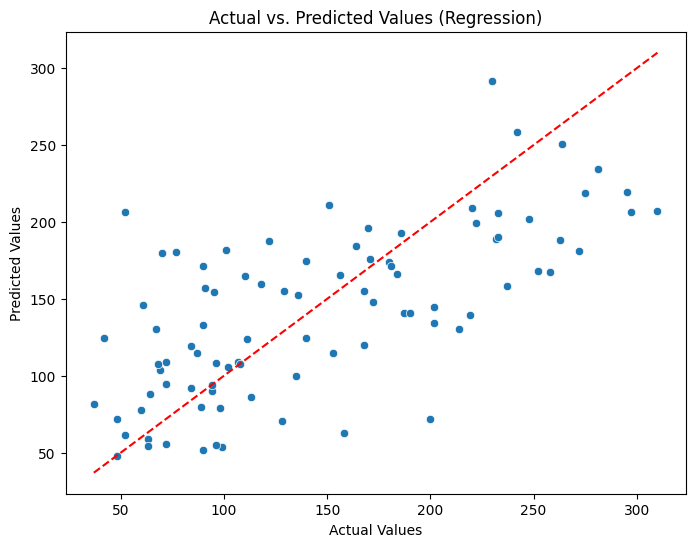

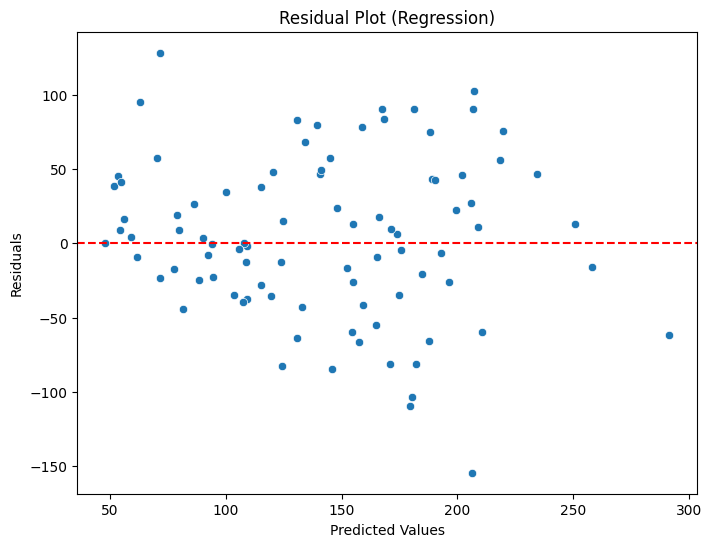

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_r, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")

plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], color='red', linestyle='--')

plt.show()

residuals = y_test_r - predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Regression)")
plt.show()